### Find and Visualize Missing Data

In [1]:
import pandas as pd
# !pip install missingno

# Load data from our dataset file into a pandas dataframe
# https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/titanic.csv
df = pd.read_csv(r"C:\Users\Lisa Chukwu\Downloads\titanic.csv", index_col=False, sep=",", header=0)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df.shape
#we have 891 rows(containing passenger info) and 12 columns(variables)

(891, 12)

From History, we know we had more than 2000 people on titanic and hence we understand that we have over 1000 missing records

In [3]:
# Calculate the number of empty cells in each column
# The following line consists of three commands.
# the number of missing entries per column
missing_data = df.isnull().sum().to_frame()

# Rename column holding the sums
missing_data = missing_data.rename(columns={0:'Empty Cells'})

# Print the results
print(missing_data)

             Empty Cells
PassengerId            0
Survived               0
Pclass                 0
Name                   0
Sex                    0
Age                  177
SibSp                  0
Parch                  0
Ticket                 0
Fare                   0
Cabin                687
Embarked               2


The age of 177 passengers is unknown, also whether two passengers embarked
There also is missing information of 687 cabin crew persons

<AxesSubplot:>

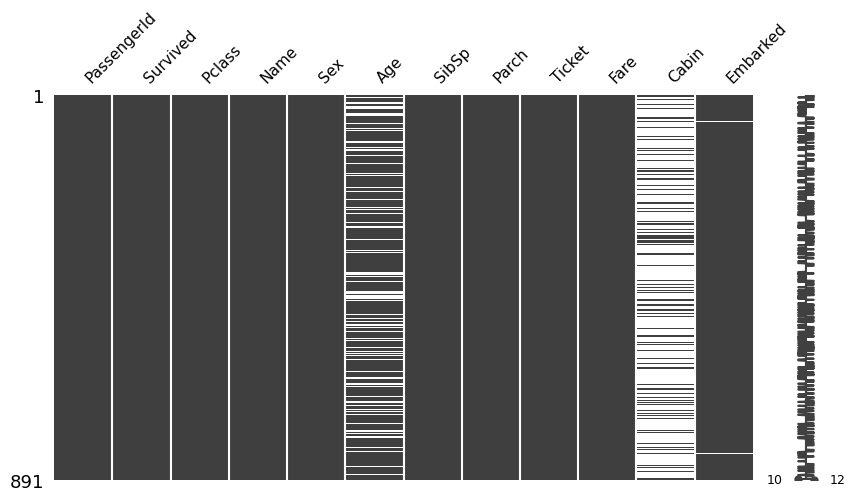

In [4]:
# import missingno package
import missingno as msno

# Plot a matrix chart, set chart and font size
msno.matrix(df, figsize=(10,5), fontsize=11)

In [5]:
# this shows visually that there are more missing records in the age and cabin colums.
# the embarked column has just 2 missing records
# the white bars represent missing entries

#using pandas to get a list of passengers with missing age

In [6]:
unknown_age = df[df["Age"].isnull()]

# Print only the colums we want for the moment (to better fit the screen)
# limit output to 20 rows
unknown_age[["Pclass","PassengerId","Name", "Survived", "Age"]][:20]

,Pclass,PassengerId,Name,Survived,Age
5,3,6,"Moran, Mr. James",0,NaN
17,2,18,"Williams, Mr. Charles Eugene",1,NaN
19,3,20,"Masselmani, Mrs. Fatima",1,NaN
26,3,27,"Emir, Mr. Farred Chehab",0,NaN
28,3,29,"O'Dwyer, Miss. Ellen ""Nellie""",1,NaN
29,3,30,"Todoroff, Mr. Lalio",0,NaN
31,1,32,"Spencer, Mrs. William Augustus (Marie Eugenie)",1,NaN
32,3,33,"Glynn, Miss. Mary Agatha",1,NaN
36,3,37,"Mamee, Mr. Hanna",1,NaN
42,3,43,"Kraeff, Mr. Theodor",0,NaN


In [7]:
# list of passengers with missing cabin and embarked info

missing_age = df["Age"].isnull()
missing_cabin = df["Cabin"].isnull()

#passengers missing both
unkn_age_cabin = df[missing_age & missing_cabin]

In [8]:
print("Number of passengers missing both age and cabin info", len(unkn_age_cabin))

Number of passengers missing both age and cabin info 158


Most passengers missing age information are also missing cabin information.

A good hypothesis is that information was not collected well for the passengers with the cheap tickets.

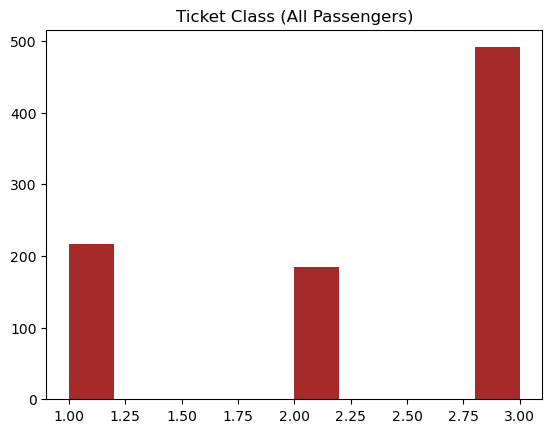

In [39]:
#histogram of ticket classes of passengers with missing info
import matplotlib.pyplot as plt

plt.hist(df['Pclass'],color = 'brown')
plt.title("Ticket Class (All Passengers)")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

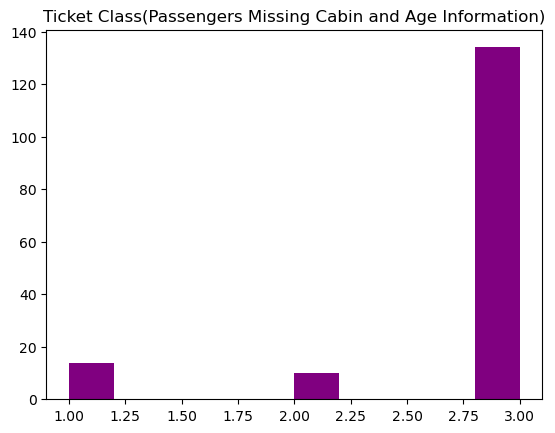

In [38]:
plt.hist(unkn_age_cabin['Pclass'], color='purple')
plt.title("Ticket Class(Passengers Missing Cabin and Age Information)")
plt.show

So a greater percentage of the passengers with missing information are those with cheap tickets 

In [11]:
import numpy as np

mean_age = np.mean(df.Age)
print("The average age on the ship was", mean_age, "years old")

# Now make another model where missing ages contained a 0
df['Age_2'] = df['Age'].fillna(0)
mean_age = np.mean(df.Age_2)
print("The average age on the ship was", mean_age, "years old")

The average age on the ship was 29.69911764705882 years old
The average age on the ship was 23.79929292929293 years old


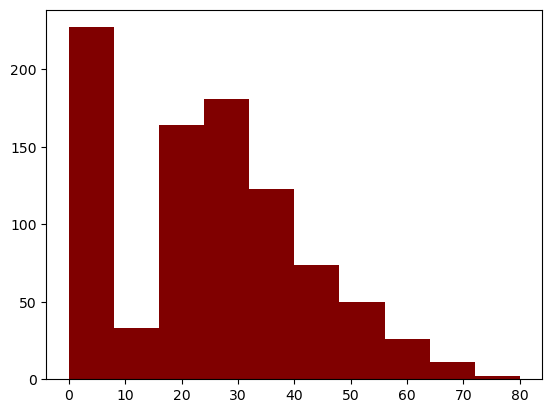

<Figure size 1500x700 with 0 Axes>

In [33]:
plt.hist(df["Age_2"], color = 'maroon')
plt.figure(figsize = (15,7))
plt.show()

# from this now, notice that there is an unlikely number of very young children

In [34]:
#Handling Missing Data

#first, some data from the embarked column is removed, this column has only rwo missing data

print(f"The original size of our dataset was", df.shape)
clean_df = df.dropna(subset=["Embarked"])
clean_df = clean_df.reindex()
print("The shape for the clean dataset is", clean_df.shape)

The original size of our dataset was (891, 13)
The shape for the clean dataset is (889, 13)


In [35]:
# Replacing empty values with the mean Age

# Calculating the mean value for the Age column
mean_age = clean_df["Age"].mean()

print("The mean age is", mean_age)

# Replace empty values in "Age" with the mean calculated above
clean_df["Age"].fillna(mean_age, inplace=True)

# Let's see what the clean dataset looks like now
print(clean_df.isnull().sum().to_frame().rename(columns={0:'Empty Cells'}))

The mean age is 29.64209269662921
             Empty Cells
PassengerId            0
Survived               0
Pclass                 0
Name                   0
Sex                    0
Age                    0
SibSp                  0
Parch                  0
Ticket                 0
Fare                   0
Cabin                687
Embarked               0
Age_2                  0


Age Column no longer has empty rows.

In [37]:
# The cabin column has categorical data, an unknown category is created and assigned to the missing rows.

# Assign unknow to records where "Cabin" is empty
clean_df["Cabin"].fillna("Unknown", inplace=True)

# Let's see what the clean dataset looks like now
print(clean_df.isnull().sum().to_frame().rename(columns={0:'Empty Cells'}))

             Empty Cells
PassengerId            0
Survived               0
Pclass                 0
Name                   0
Sex                    0
Age                    0
SibSp                  0
Parch                  0
Ticket                 0
Fare                   0
Cabin                  0
Embarked               0
Age_2                  0


There is no more missing data in this dataset.

In the process of cleaning this data, only two records were lost in the Embarked column.

Approximations were made to fill the Age and Cabin columns, and this will influence the performance of any model trained on this data